------------------------------------------------------------------------

# **Exploring Dominant Artists in Spotify Songs and Playlists**

------------------------------------------------------------------------

**Author:** Yashwanth N <br> **Date:** 14/10/2023

Hello Everyone, Here I am going to follow a traditional approach of Data Analytics to find the dominant artist in Top spotify songs and extracts their insights. This Traditional Approach includes 6 phases of Data Analytics ASK:PREPARE:PROCESS:ANALYZE:SHARE:ACT.

***Scenario***

In today's ever:evolving music landscape, the question of who dominates Spotify playlists has become an intriguing puzzle. With millions of users streaming songs daily, understanding the dynamic interplay of artists, genres, and trends within Spotify's playlists has never been more critical.

Our project embarks on a journey to unravel this musical tapestry. We'll dive deep into Spotify's vast dataset, collecting and analyzing data on playlist compositions, user preferences, and listening habits. With this treasure trove of information, we aim to identify the artists, songs, and genres that wield the most influence over Spotify's playlists.

By combining data analytics, machine learning, and statistical techniques, we will not only unveil the current dominators but also gain insights into the factors driving their prominence. Whether it's the catchy hooks of a viral sensation or the enduring classics of a legendary artist, our project will provide a comprehensive view of who holds the Spotify playlist throne in today's music world.

***About the Company***

Spotify, a global music streaming service, has transformed the way we consume and discover music. Launched in 2008, it boasts a vast catalog of songs, podcasts, and audio content. With millions of users worldwide, Spotify offers both free and premium subscription options, allowing listeners to access their favorite tunes on:demand, create personalized playlists, and explore a rich tapestry of genres. The platform employs advanced algorithms to curate tailored music recommendations, enhancing the user experience. Spotify has revolutionized the music industry, providing artists a unique platform to share their work and enabling users to enjoy music anytime, anywhere, making it a ubiquitous presence in the digital music landscape. Click here to visit [Spotify](https://open.spotify.com/)

Data analytics is integral to Spotify's operations. It enables personalized playlists, recommendation systems, and content curation based on user preferences and listening history. This <data:driven> approach enhances the user experience and keeps users engaged. Additionally, analytics informs user interface design, feature development, and content licensing decisions. Spotify also employs data analytics to track industry trends, artist performance, and emerging genres for strategic planning. For ad:supported users, analytics helps target advertisements effectively. In essence, data analytics is a cornerstone of Spotify's success, shaping the platform's content and user interactions while driving informed business decisions.

***Objective of my Case Study***

This case study mainly focuses on the following:

1.  Determining the current dominant artists, songs, or genres within Spotify playlists.
2.  Explore the factors and trends contributing to their prominence.

<br>

------------------------------------------------------------------------

# **Ask**

------------------------------------------------------------------------

**Bussiness Task:** In order to determine the current dominant artist, songs or generes within spotify playlist, I will use a traditional approach of data analytics, perform a couple of analysis and try to find patterns and extract the valuable insights.

**Expected Outcome:** By the end of this project, I will be able to declare the dominat artists, songs or generes.

<br>

------------------------------------------------------------------------

# **Prepare**

------------------------------------------------------------------------

**About the dataset:** In the realm of music streaming, our focus is on one of the industry's giants. With a vast dataset painstakingly acquired through web scraping, we've compiled extensive stream metrics for artists and their songs. The central query: who claims the throne as the most:streamed on this prominent platform? Our mission is to reveal the top:tier artists who have garnered unparalleled streaming success, providing valuable insights into the contemporary music landscape on this major streaming platform.

Here is the detailed information about the columns included in this [dataset](https://www.kaggle.com/datasets/rakkesharv/spotify-top-10000-streamed-songs/).

**Position:** Spotify Ranking

**Artist Name:** Artist Name

**Song Name:** Song Name

**Days:** No of days since the release of the song (Updated)

**Top 10 (n Times):** No of times inside top 10

**Peak Position:** : Peak position attained

**Peak Position (n Times):** No of times Peak position attained

**Peak Streams:** Total no of streams during Peak position

**Total Streams:** Total song streams

<br>

#### **Loading the required packages**

In [1]:
#loading the required pacakages 
library(tidyverse) #helps to wrangle the data
library(dplyr) #grammer of data manipulation
library(here) #simple way to find the files
library(skimr) #to extract summaries of data
library(readr) #read rectangular text data
library(janitor) #to clean the data
library(lubridate) #helps to wrangle the data attributes
library(ggplot2) #helps to visualize the data
library(ggrepel) #labeling

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test





#### **Importing the dataset**


In [2]:
#importing the dataset
mydata <- read_csv("/kaggle/input/my-spotify-dataset/Spotify_final_dataset.csv")

Rows: 11084 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Artist Name, Song Name, Peak Position (xTimes)
dbl (6): Position, Days, Top 10 (xTimes), Peak Position, Peak Streams, Total...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



#### **Checking the Dataset**


In [3]:
#displays first 6 rows of dataset
head(mydata)

Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961
6,Travis Scott,goosebumps,1995,4,8,0,977275,672972704


In [4]:
#displays the structure of dataset
str(mydata)

spc_tbl_ [11,084 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Position              : num [1:11084] 1 2 3 4 5 6 7 8 9 10 ...
 $ Artist Name           : chr [1:11084] "Post Malone" "Juice WRLD" "Lil Uzi Vert" "J. Cole" ...
 $ Song Name             : chr [1:11084] "Sunflower  SpiderMan: Into the SpiderVerse" "Lucid Dreams" "XO TOUR Llif3" "No Role Modelz" ...
 $ Days                  : num [1:11084] 1506 1673 1853 2547 1223 ...
 $ Top 10 (xTimes)       : num [1:11084] 302 178 212 6 186 4 233 44 133 2 ...
 $ Peak Position         : num [1:11084] 1 1 1 7 1 8 1 2 1 5 ...
 $ Peak Position (xTimes): chr [1:11084] "(x29)" "(x20)" "(x4)" "0" ...
 $ Peak Streams          : num [1:11084] 2118242 2127668 1660502 659366 2905678 ...
 $ Total Streams         : num [1:11084] 8.83e+08 8.65e+08 7.81e+08 7.35e+08 7.19e+08 ...
 - attr(*, "spec")=
  .. cols(
  ..   Position = col_double(),
  ..   `Artist Name` = col_character(),
  ..   `Song Name` = col_character(),
  ..   Days = col_double(),
  ..   `T

In [5]:
#displays the number of rows and columns of the dataset
dim(mydata)

[1] 11084     9


------------------------------------------------------------------------

# **Process**

------------------------------------------------------------------------

In [6]:
#displays the column names of the dataset
colnames(mydata)

[1] "Position"               "Artist Name"            "Song Name"             
[4] "Days"                   "Top 10 (xTimes)"        "Peak Position"         
[7] "Peak Position (xTimes)" "Peak Streams"           "Total Streams"

In [7]:
#Assuming your data frame is named 'mydata'
new_colnames <- colnames(mydata)

#Find the indices of the columns you want to change
indices_to_change <- which(new_colnames %in% c("Peak Position (xTimes)", "Top 10 (xTimes)"))

#Update the column names at the specified indices
new_colnames[indices_to_change] <- c("Peak Position (n Times)", "Top 10 (n Times)")

#Assign the updated column names back to the data frame
colnames(mydata) <- new_colnames

In [8]:
#preview
head(mydata)
colnames(mydata)

Position,Artist Name,Song Name,Days,Peak Position (n Times),Peak Position,Top 10 (n Times),Peak Streams,Total Streams
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961
6,Travis Scott,goosebumps,1995,4,8,0,977275,672972704


[1] "Position"                "Artist Name"            
[3] "Song Name"               "Days"                   
[5] "Peak Position (n Times)" "Peak Position"          
[7] "Top 10 (n Times)"        "Peak Streams"           
[9] "Total Streams"

In [9]:
#statistical summary of dataset
summary(mydata)

    Position     Artist Name         Song Name              Days        
 Min.   :    1   Length:11084       Length:11084       Min.   :   1.00  
 1st Qu.: 2772   Class :character   Class :character   1st Qu.:   2.00  
 Median : 5542   Mode  :character   Mode  :character   Median :   7.00  
 Mean   : 5542                                         Mean   :  53.37  
 3rd Qu.: 8313                                         3rd Qu.:  39.00  
 Max.   :11084                                         Max.   :2547.00  
 Peak Position (n Times) Peak Position    Top 10 (n Times)    Peak Streams    
 Min.   :  0.000         Min.   :  1.00   Length:11084       Min.   :  44323  
 1st Qu.:  0.000         1st Qu.: 29.00   Class :character   1st Qu.: 243160  
 Median :  0.000         Median : 75.00   Mode  :character   Median : 350588  
 Mean   :  2.714         Mean   : 83.07                      Mean   : 552947  
 3rd Qu.:  0.000         3rd Qu.:132.00                      3rd Qu.: 596338  
 Max.   :302.00

In [10]:
#number of duplicate values 
sum(duplicated(mydata))

[1] 0


------------------------------------------------------------------------

# **Analyze**

------------------------------------------------------------------------
<br>

Creating Separate DataFrame for top 10 Artists with most number of songs.

In [11]:
# Group by Artist Name, count the number of songs, and arrange in descending order
top_10_artists <- mydata %>%
  group_by(`Artist Name`) %>%
  summarize(Count = n()) %>%
  arrange(desc(Count)) %>%
  head(10)
# Filter the original data frame to include only the songs by the top 10 artists
filtered_data <- mydata %>%
  filter(`Artist Name` %in% top_10_artists$`Artist Name`)
top10_artists_nSongs <- filtered_data

In [12]:
n_unique(top10_artists_nSongs$`Artist Name`)
unique(top10_artists_nSongs$`Artist Name`)

[1] 10

[1] "Juice WRLD"                 "The Weeknd"                
 [3] "Lil Baby"                   "Drake"                     
 [5] "Logic"                      "Future"                    
 [7] "Kanye West"                 "Trippie Redd"              
 [9] "Taylor Swift"               "YoungBoy Never Broke Again"

In [13]:
View(top10_artists_nSongs)

Position,Artist Name,Song Name,Days,Peak Position (n Times),Peak Position,Top 10 (n Times),Peak Streams,Total Streams
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953
10,Juice WRLD,All Girls Are The Same,1681,2,5,0,1239152,613872384
14,Lil Baby,Drip Too Hard (Lil Baby & Gunna),1453,122,1,(x6),1759294,583443174
18,Drake,God's Plan,634,139,1,(x70),4739798,534994242
23,Drake,One Dance,772,187,1,(x103),2767175,454267392
25,Juice WRLD,Robbery,1086,38,2,(x2),1724447,443773199
36,Lil Baby,Yes Indeed,970,43,2,(x9),1838350,400193604
39,The Weeknd,The Hills,1243,194,1,(x6),1147436,392023505


<br>

Creating separate dataframe with top 10 artists with respect to stream count.

In [14]:
# Group by Artist Name, sum the Total Streams, and arrange in descending order
top_10_streaming_artists <- mydata %>%
  group_by(`Artist Name`) %>%
  summarize(Total_Stream_Count = sum(`Total Streams`)) %>%
  arrange(desc(Total_Stream_Count)) %>%
  head(10)

# Filter the original data frame to include only the songs by the top 10 streaming artists
filtered_stream_data <- mydata %>%
  filter(`Artist Name` %in% top_10_streaming_artists$`Artist Name`)
top10_artists_Streams <- filtered_stream_data

In [15]:
View(top10_artists_Streams)

Position,Artist Name,Song Name,Days,Peak Position (n Times),Peak Position,Top 10 (n Times),Peak Streams,Total Streams
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961
7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953
8,XXXTENTACION,Jocelyn Flores,1673,44,2,(x1),3175206,624457164
9,XXXTENTACION,SAD!,1217,133,1,(x6),4437612,619879245
10,Juice WRLD,All Girls Are The Same,1681,2,5,0,1239152,613872384
12,Post Malone,Circles,1172,163,1,(x38),3441328,598521764


Creating separate dataframe with top 10 songs with respect to stream count

In [16]:
# Arrange songs by Total Streams in descending order and select the top 10
top10_Songs_Streams <- mydata %>%
  arrange(desc(`Total Streams`)) %>%
  head(10)

In [17]:
View(top10_Songs_Streams)

Position,Artist Name,Song Name,Days,Peak Position (n Times),Peak Position,Top 10 (n Times),Peak Streams,Total Streams
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302,1,(x29),2118242,883369738
2,Juice WRLD,Lucid Dreams,1673,178,1,(x20),2127668,864832399
3,Lil Uzi Vert,XO TOUR Llif3,1853,212,1,(x4),1660502,781153024
4,J. Cole,No Role Modelz,2547,6,7,0,659366,734857487
5,Post Malone,rockstar,1223,186,1,(x124),2905678,718865961
6,Travis Scott,goosebumps,1995,4,8,0,977275,672972704
7,The Weeknd,Blinding Lights,1100,233,1,(x11),2355059,644287953
8,XXXTENTACION,Jocelyn Flores,1673,44,2,(x1),3175206,624457164
9,XXXTENTACION,SAD!,1217,133,1,(x6),4437612,619879245


<br>

Creating separate dataframe with top 10 artists with respect to no of times they hit the peak.

In [18]:
# Group by Artist Name, count the number of times each artist entered the top "Peak Position (n Times)," and arrange in descending order
top_10_artists_peak_count <- mydata %>%
  group_by(`Artist Name`) %>%
  summarize(Peak_Position_Count = sum(`Peak Position (n Times)`)) %>%
  arrange(desc(Peak_Position_Count)) %>%
  head(10)

top10_Artists_nPeaks <- top_10_artists_peak_count

In [19]:
View(top10_Artists_nPeaks)

Artist Name,Peak_Position_Count
<chr>,<dbl>
Drake,2364
Post Malone,1706
The Weeknd,1157
Ariana Grande,769
Justin Bieber,675
Lil Nas X,641
Juice WRLD,618
Taylor Swift,615
Olivia Rodrigo,556


<br>

Creating separate dataframe with top 10 songs with respect to no of times it hit the peak

In [20]:
# Group by Song Name, count the number of times it entered the top "Peak Position (n Times)", and arrange in descending order
top_10_songs_peak_count <- mydata %>%
  group_by(`Song Name`) %>%
  summarize(Peak_Count = sum(`Peak Position (n Times)`)) %>%
  arrange(desc(Peak_Count)) %>%
  head(10)

# Filter the original data frame to include only the top 10 songs by Peak Position (n Times)
filtered_peak_count_data <- mydata %>%
  filter(`Song Name` %in% top_10_songs_peak_count$`Song Name`)

top10_Songs_nPeaks <- top_10_songs_peak_count

In [21]:
View(top10_Songs_nPeaks)

Song Name,Peak_Count
<chr>,<dbl>
Sunflower SpiderMan: Into the SpiderVerse,302
Stay,290
INDUSTRY BABY,267
Heat Waves,248
Blinding Lights,233
XO TOUR Llif3,212
As It Was,203
The Box,197
The Hills,194


<br>

------------------------------------------------------------------------

# **Share**

------------------------------------------------------------------------

In the "Share" phase, we'll communicate our analysis results through visually appealing graphics, simplifying complex data to make it more accessible and engaging.

<br>

Bar Chart Representing top 10 Artists with most number of songs.

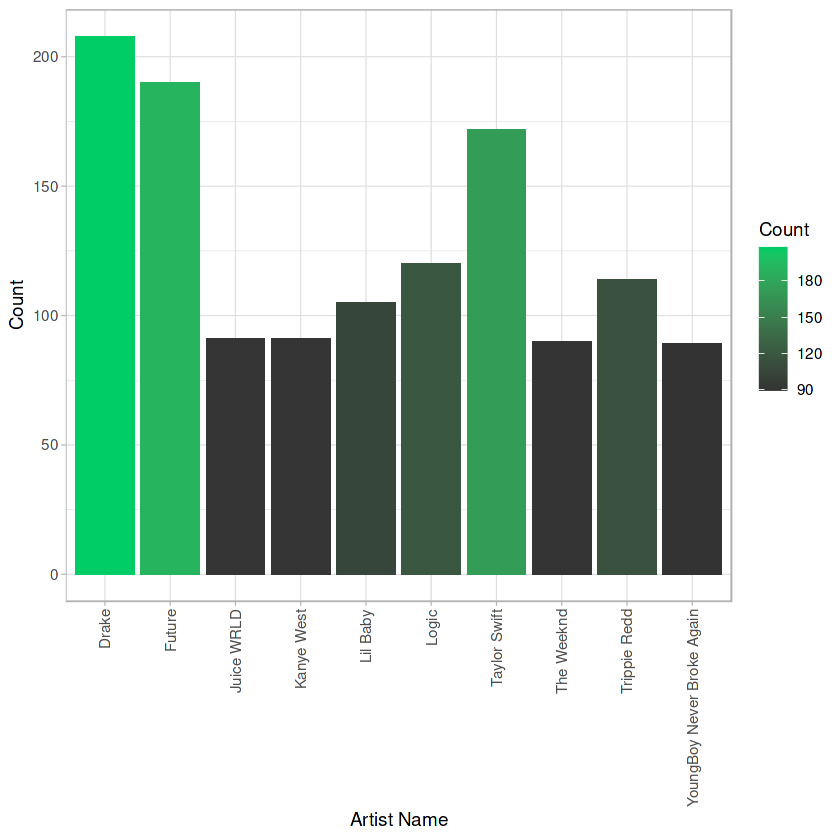

In [22]:
#Bar Chart of Artists with most number of songs
top_10_artists %>% 
  ggplot(top_10_artists, mapping = aes(x=`Artist Name`, y=`Count`, fill=`Count`))+ 
  geom_bar(position = "dodge", stat="identity")+
  scale_fill_gradient(low = "grey20", high = "springgreen3")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

Bar Chart Representing Top 10 Artists with respect to number of streams.

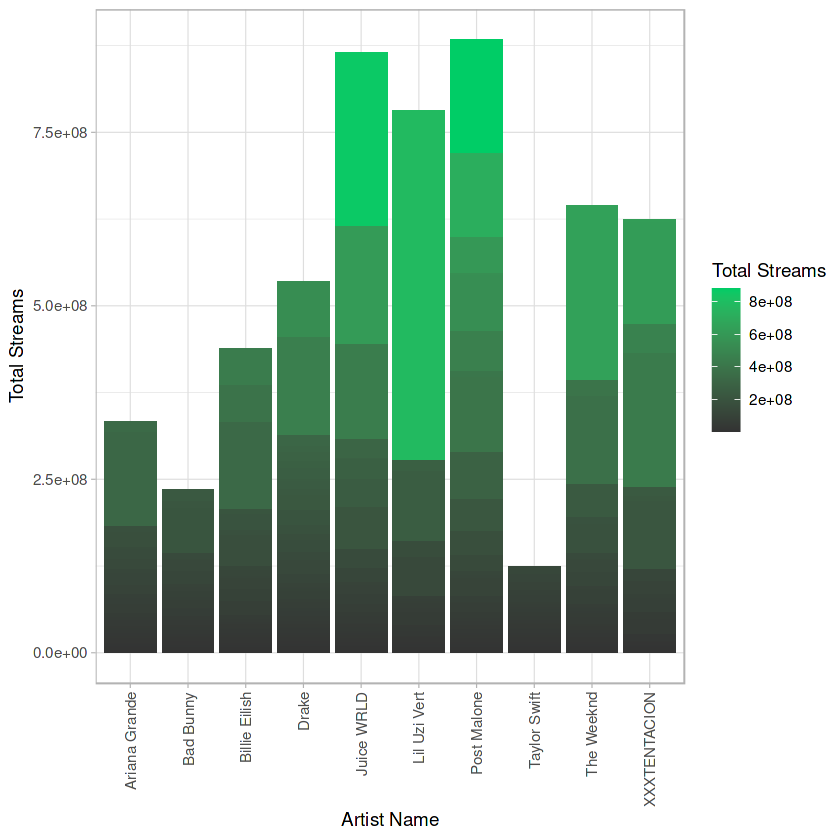

In [23]:
#Bar Chart of Artists with respect to Streams
top10_artists_Streams %>% 
  ggplot(top10_artists_Streams, mapping = aes(x=`Artist Name`, y=`Total Streams`, fill=`Total Streams`))+ 
  geom_bar(position = "dodge", stat="identity")+
  scale_fill_gradient(low = "grey20", high = "springgreen3")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))

Bar Chart Representing Top 10 Songs with respect to number of streams.

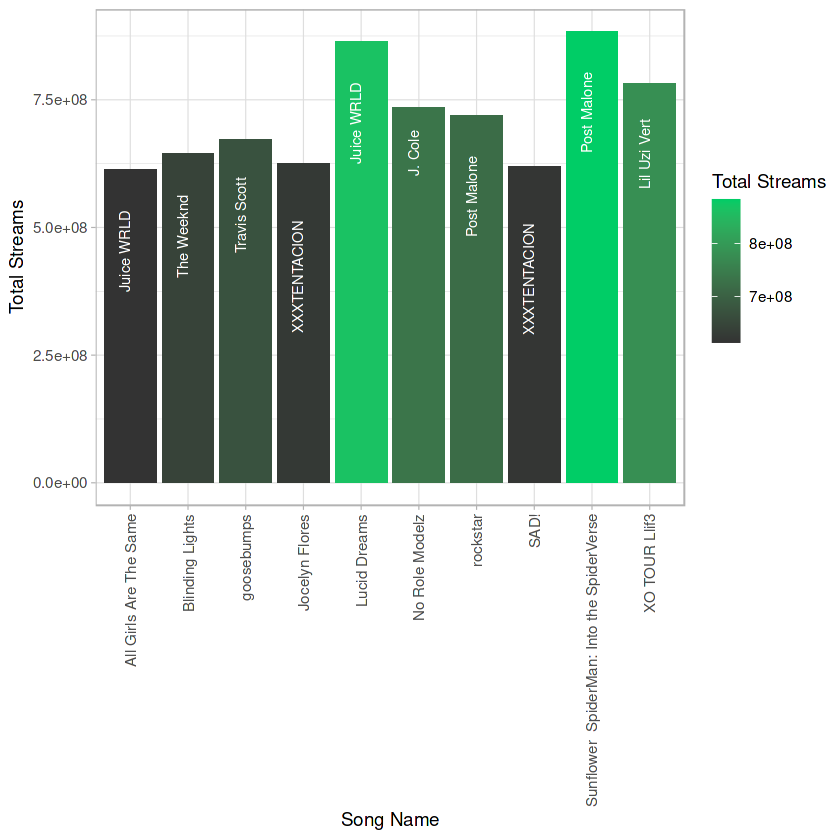

In [24]:
#Bar Chart of Songs with respect to Streams
top10_Songs_Streams %>% 
  ggplot(top10_Songs_Streams, mapping = aes(x=`Song Name`, y=`Total Streams`, fill=`Total Streams`))+ 
  geom_bar(position = "dodge", stat="identity")+
  scale_fill_gradient(low = "grey20", high = "springgreen3")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+labs(height=10, width=5)+
  geom_text(aes(label = `Artist Name`),color="white",hjust= 1.5, vjust = 0, size = 3, angle = 90, position = position_dodge(width = 1))

Bar Chart Representing Top 10 Artists with respect to number of they reached the peak.

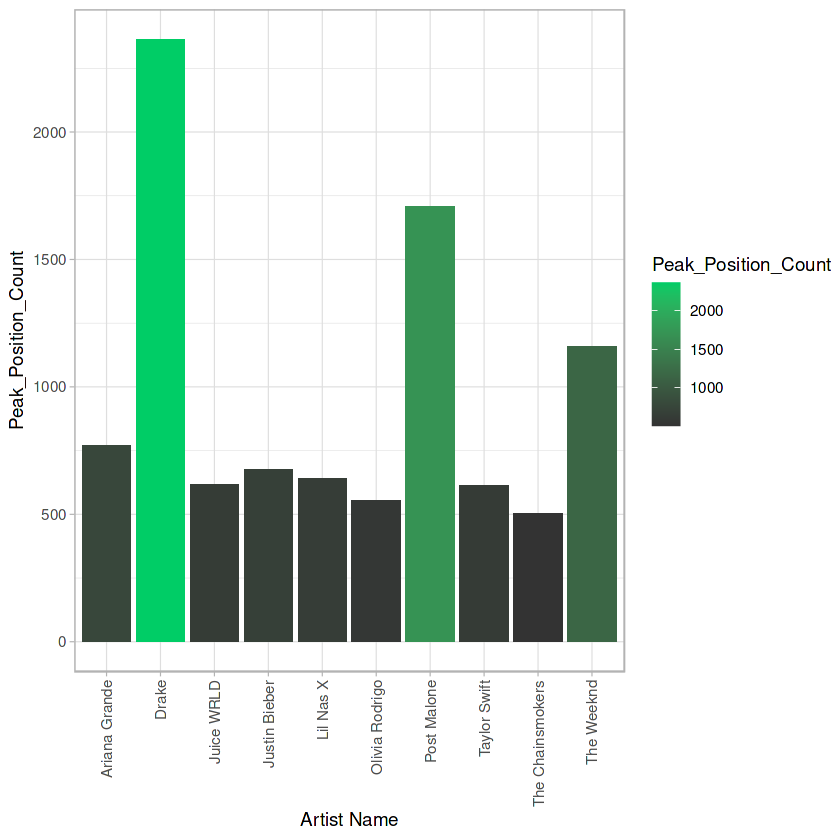

In [25]:
#Bar Chart of Artists with respect to number of time they hit the peak
top10_Artists_nPeaks %>% 
  ggplot(top10_Artists_nPeaks, mapping = aes(x=`Artist Name`, y=`Peak_Position_Count`, fill=`Peak_Position_Count`))+ 
  geom_bar(position = "dodge", stat="identity")+
  scale_fill_gradient(low = "grey20", high = "springgreen3")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+labs(height=10, width=5)

Bar Chart Representing Top 10 Songs with respect to number of they hit the peak.

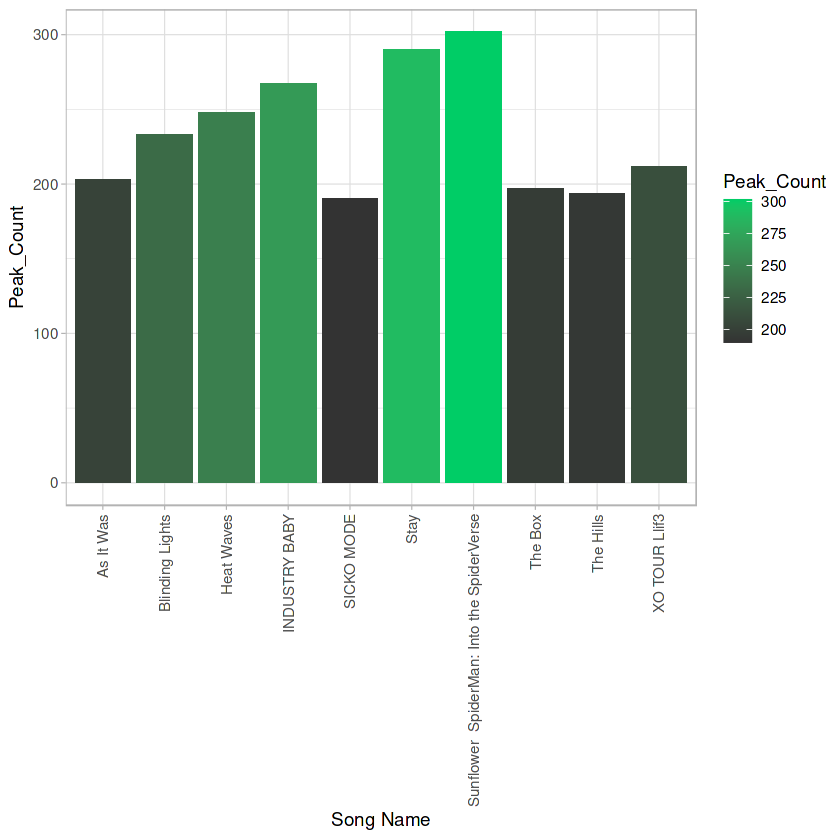

In [26]:
#Bar Chart of Songs with respect to number of time they hit the peak
top10_Songs_nPeaks %>% 
  ggplot(top10_Songs_nPeaks, mapping = aes(x=`Song Name`, y=`Peak_Count`, fill=`Peak_Count`))+ 
  geom_bar(position = "dodge", stat="identity")+
  scale_fill_gradient(low = "grey20", high = "springgreen3")+
  theme_light()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+labs(height=10, width=5)


<br>

------------------------------------------------------------------------

# **Act (Conclusion)**

------------------------------------------------------------------------

According the above analysis we found these meaningful insights.

-   Drake is concluded to be the dominant artist with 200+ songs published, over 500 million artist streams.
-   Drake also reached top postion more than 2300+ times, this is the highest by any artist.
-   It is also concluded that Post Malone and his song "Sunflower SpiderMan: Into the SpiderVerse" has more number of streams.
-   Post malone and his song "Sunflower SpiderMan: Into the SpiderVerse" has peaked the streaming chart with approximately 883.37 billion total streams and 2.12 billion peak streams.
-   Post malone also reached the top postion second most number of times after Drake that is 1700+ times.

Hence it is finally concluded that Drake and Post Malone dominates the Spotify Playlists.

------------------------------------------------------------------------

***Author's Message:*** *If you've found my analysis helpful, please upvote and feel free to reach out for support or inquiries. Thank you!*

------------------------------------------------------------------------